Which price_type do you want to check for its relationship?(Open,Close,High,Low) Low


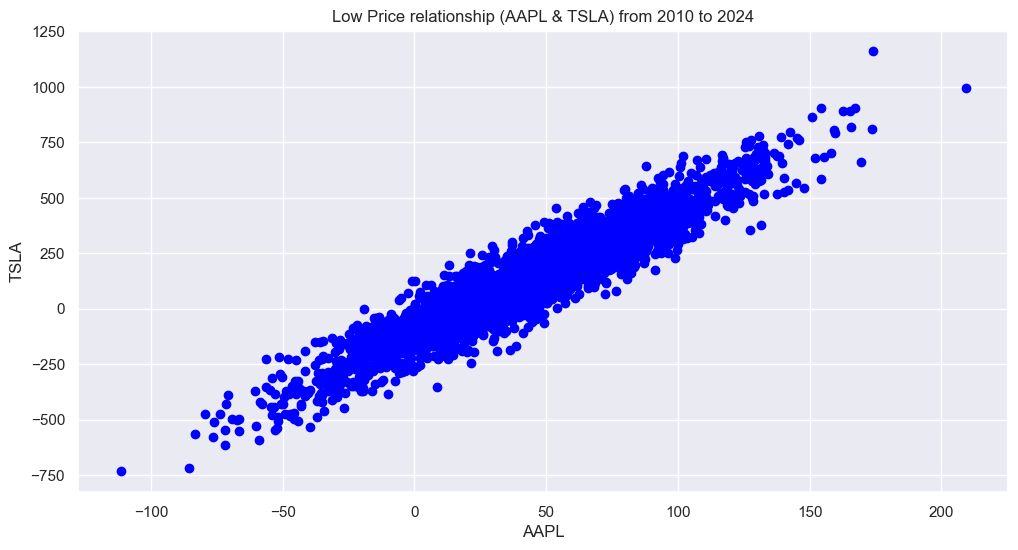

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

seaborn.set()
np.random.RandomState(0)

TSLA = pd.read_csv('TSLA.csv')
AAPL = pd.read_csv('AAPL.csv')

AAPL = AAPL.query(" Date >=  '2010-06-29' & Date <= '2022-03-24' ")
AAPL.index = np.arange(1,len(AAPL)+1)
TSLA.index =  np.arange(1,len(TSLA)+1)
len(AAPL), len(TSLA)

AAPL_dict = {
    'Open':AAPL['Open'],
    'Close':AAPL['Close'],
    'High':AAPL['High'],
    'Low':AAPL['Low'],
}

TSLA_dict = {
    'Open':TSLA['Open'],
    'Close':TSLA['Close'],
    'High':TSLA['High'],
    'Low':TSLA['Low'],
}

AAPL_data = pd.DataFrame(AAPL_dict)
TSLA_data = pd.DataFrame(TSLA_dict)


def stock_rel( price_type ):
    mean_list = [AAPL_data[ price_type ].mean() , TSLA_data[ price_type ].mean()]    
    df_cov = pd.DataFrame({
        'AAPL_cov': AAPL_data[ price_type ],
        'TSLA_cov': TSLA_data[ price_type ]
    })
    get_rel = np.random.multivariate_normal(mean_list, df_cov.cov(), len(TSLA_data[ price_type ]))
    plt.figure(figsize=(12,6))
    plt.title(f'{price_type} Price relationship (AAPL & TSLA) from 2010 to 2024')
    plt.xlabel('AAPL')
    plt.ylabel('TSLA')
    plt.scatter(get_rel[:,0], get_rel[:,1] , color='blue', marker= 'o')
    plt.show()
    return

if __name__ == '__main__':
    question = input('Which price_type do you want to check for its relationship?(Open,Close,High,Low)')
    question = str(question).strip()
    stock_rel(question)
